<a href="https://colab.research.google.com/github/aparnavinayankozhipuram/Mistral-7B-Evaluation/blob/main/Copy_of_CompareLlama3_18BvsRAGMistral7B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

    Metric          System     Score               Group
0     BLEU    Llama 3.1 8B  0.008194  Lexical Similarity
1     BLEU  RAG Mistral-7B  0.064307  Lexical Similarity
2  ROUGE-1    Llama 3.1 8B  0.049153  Lexical Similarity
3  ROUGE-1  RAG Mistral-7B  0.284187  Lexical Similarity
4  ROUGE-L    Llama 3.1 8B  0.043703  Lexical Similarity


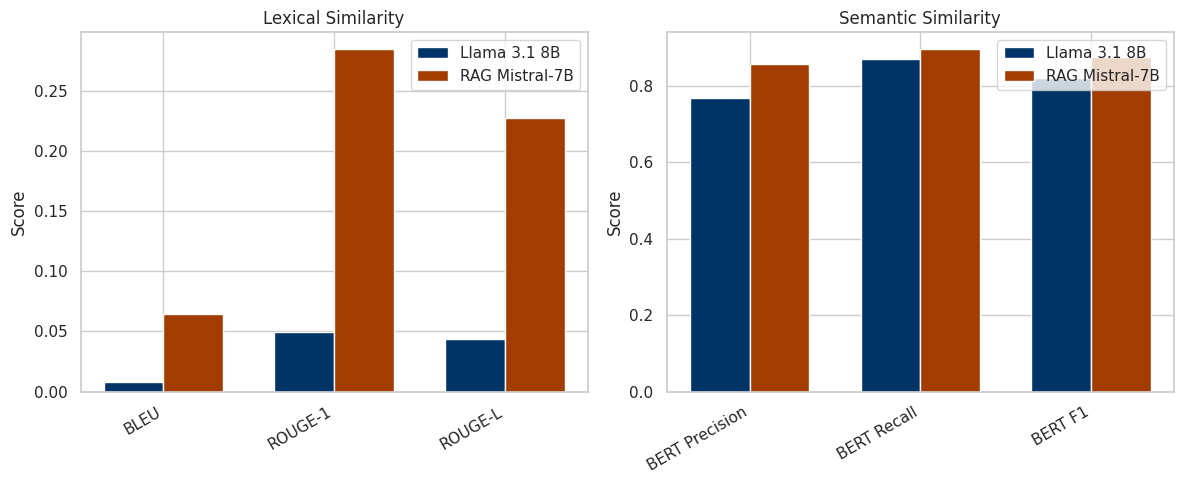

In [ ]:
sns.set_theme(style='whitegrid')
lexical_metrics=['BLEU','ROUGE-1','ROUGE-L']
semantic_metrics=['BERT Precision','BERT Recall','BERT F1']
label_base='Llama 3.1 8B'
label_mistral='RAG Mistral-7B'
base_vals=[0.0081942,0.0491528,0.043703,0.768868,0.8705658,0.8192280]
mistral_vals=[0.064307,0.284187,0.227196,0.857671,0.894786,0.875506]
metrics=lexical_metrics+semantic_metrics
records=[]
for metric,val_base,val_mis in zip(metrics,base_vals,mistral_vals):
    group='Lexical Similarity' if metric in lexical_metrics else 'Semantic Similarity'
    records.append({'Metric':metric,'System':label_base,'Score':val_base,'Group':group})
    records.append({'Metric':metric,'System':label_mistral,'Score':val_mis,'Group':group})
df=pd.DataFrame(records)
print(df.head())

fig,axes=plt.subplots(1,2,figsize=(12,5))
colors={label_base:'#003366',label_mistral:'#A33C00'}  # blue for baseline, orange for RAG
width=0.35
for ax,group,order in zip(axes,['Lexical Similarity','Semantic Similarity'],[lexical_metrics,semantic_metrics]):
    sel=df[df['Group']==group].copy()
    sel['Metric']=pd.Categorical(sel['Metric'],categories=order,ordered=True)
    sel.sort_values('Metric',inplace=True)
    piv=sel.pivot(index='Metric',columns='System',values='Score')
    x=range(len(piv))
    ax.bar([p-width/2 for p in x],piv[label_base],width,color=colors[label_base],label=label_base)
    ax.bar([p+width/2 for p in x],piv[label_mistral],width,color=colors[label_mistral],label=label_mistral)
    ax.set_xticks(x)
    ax.set_xticklabels(piv.index,rotation=30,ha='right')
    ax.set_title(group)
    ax.set_ylabel('Score')
    ax.legend(loc='upper right')
plt.tight_layout()
plt.show()